In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import dendrotweaks as dd

In [3]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [4]:
model = dd.Model(name='Park_2019', 
                 path_to_data=path_to_data)

In [5]:
model.print_directory_tree()

├── membrane
│   ├── Park_2019_full.json
│   └── Park_2019_test.json
├── mod
│   ├── CaHVA
│   │   ├── CaHVA.mod
│   │   └── x86_64
│   ├── CaHVA.mod
│   ├── CaLVA
│   │   ├── CaLVA.mod
│   │   └── x86_64
│   ├── CaLVA.mod
│   ├── KCa
│   │   ├── KCa.mod
│   │   └── x86_64
│   ├── KCa.mod
│   ├── Ka
│   │   ├── Ka.mod
│   │   └── x86_64
│   ├── Ka.mod
│   ├── Km
│   │   ├── Km.mod
│   │   └── x86_64
│   ├── Km.mod
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   └── Na.mod
├── mod_temp
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   └── Km.mod
├── morphology
│   └── Park_2019.swc
├── python
│   ├── CaHVA.py
│   ├── CaLVA.py
│   ├── KCa.py
│   ├── Ka.py
│   ├── Km.py
│   ├── Kv.py
│   ├── Na.py
│   └── __pycache__
│       ├── CaHVA.cpython-311.pyc
│       ├── CaLVA.cpython-311.pyc
│       ├── KCa.cpython-311.pyc
│       ├── Ka.cpython-311.pyc
│       ├── Km.cpython-311.pyc
│       ├── Kv.cpython-3

In [6]:
model.load_morphology(file_name='Park_2019')

Removed 0 overlapping nodes.
Removed 0 overlapping nodes.
Soma is already in 3PS notation.
  Elapsed time: 0.02 seconds
Extended 44 nodes.
  Elapsed time: 0.03 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds
Building sections in NEURON...
52 sections created.
Adding group all...
Adding group axonal...
Adding group somatic...
Adding group dendritic...
Adding group apical...


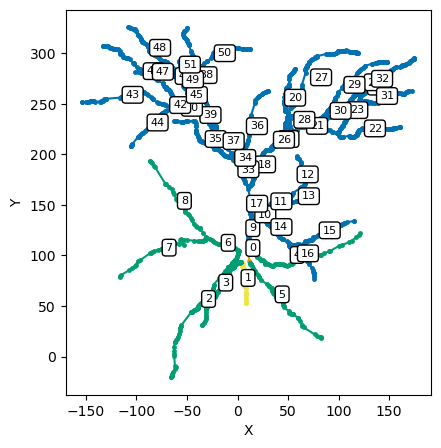

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

# Mechanisms

In [8]:
model.add_default_mechanisms(recompile=False)

Adding mechanism vecstim to model...
Using precompiled mechanism "vecstim"
Loaded mechanism "vecstim"
Mechanism vecstim loaded to NEURON.

Adding mechanism AMPA_NMDA to model...
Using precompiled mechanism "AMPA_NMDA"
Loaded mechanism "AMPA_NMDA"
Mechanism AMPA_NMDA loaded to NEURON.

Adding mechanism Leak to model...
Using precompiled mechanism "Leak"
Loaded mechanism "Leak"
Mechanism Leak loaded to NEURON.

Adding mechanism AMPA to model...
Using precompiled mechanism "AMPA"
Loaded mechanism "AMPA"
Mechanism AMPA loaded to NEURON.

Adding mechanism GABAa to model...
Using precompiled mechanism "GABAa"
Loaded mechanism "GABAa"
Mechanism GABAa loaded to NEURON.

Adding mechanism NMDA to model...
Using precompiled mechanism "NMDA"
Loaded mechanism "NMDA"
Mechanism NMDA loaded to NEURON.



In [9]:
model.add_mechanisms(recompile=False)

Replacing SUFFIX Na with SUFFIX Na
Overwritten /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/Na.mod
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Na.py
Registering Na from Na in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class Na from module Na.py
Adding mechanism Na to model...
Using precompiled mechanism "Na"
Loaded mechanism "Na"
Mechanism Na loaded to NEURON.

Mechanism Na added to model.
Replacing SUFFIX KCa with SUFFIX KCa
Overwritten /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/KCa.mod
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/KCa.py
Registering KCa from KCa in /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python
Importing class KCa from module KCa.py
Adding mechanism KCa to model...
Using precompiled mechanism "KCa"
Loaded mechanism "KCa"
Mechanism KCa loaded to NEURON.

Mechanism KCa added to mode

In [10]:
model.mechanisms

{'Leak': <Mechnaism(Leak)>,
 'Na': <Mechnaism(Na)>,
 'KCa': <Mechnaism(KCa)>,
 'Kv': <Mechnaism(Kv)>,
 'Ka': <Mechnaism(Ka)>,
 'CaHVA': <Mechnaism(CaHVA)>,
 'Km': <Mechnaism(Km)>,
 'CaLVA': <Mechnaism(CaLVA)>}

In [11]:
for domain_name in model.domains:
    for mech_name in model.mechanisms:
        model.insert_mechanism(mech_name, domain_name, distribute=False)

In [12]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,Ra,all,constant,{'value': 35.4}
2,Independent,ena,all,constant,{'value': 50}
3,Independent,ek,all,constant,{'value': -77}
4,Independent,eca,all,constant,{'value': 140}
5,Leak,gbar_Leak,all,constant,{'value': 0.0}
6,Leak,e_Leak,all,constant,{'value': -70}
7,Na,gbar_Na,all,constant,{'value': 0.0}
8,Na,Rma_Na,all,constant,{'value': 0.182}
9,Na,Rmb_Na,all,constant,{'value': 0.14}


# Groups

In [13]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'soma', 'dend', 'apic']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'dendritic': SegmentGroup("dendritic", domains=['dend']),
 'apical': SegmentGroup("apical", domains=['apic'])}

In [14]:
model.add_group(
    'dendritic_thin', domains=['dend', 'apic'],
    select_by='diam', max_value=0.8
)
model.add_group(
    'dendritic_thick', domains=['dend', 'apic'],
    select_by='diam', min_value=0.8
)

model.add_group(
    'proximal_apical', domains=['apic'],
    select_by='domain_distance', max_value=260   
)
model.add_group(
    'distal_apical', domains=['apic'],
    select_by='domain_distance', min_value=260
)

model.add_group('basal', domains=['dend'])

model.add_group('dendritic', domains=['dend', 'apic'])

Adding group dendritic_thin...
Adding group dendritic_thick...
Adding group proximal_apical...
Adding group distal_apical...
Adding group basal...
Adding group dendritic...


In [15]:
model.set_param('cm', value=1)
model.set_param('cm', group_name='somatic', value=2)
model.set_param('Ra', value=100)

In [16]:
# model.set_segmentation(d_lambda=0.1)

In [ ]:
# Leak
model.set_param('gbar_Leak', value=0.0000909)

# Na
model.set_param('gbar_Na', group_name='somatic', value=0.0505)
model.set_param('gbar_Na', group_name='dendritic', value=0.0303)

# Kv
model.set_param('gbar_Kv', group_name='somatic', value=0.005)
model.set_param('gbar_Kv', group_name='dendritic', value=0.000_15)

# Km
model.set_param('gbar_Km', group_name='somatic', value=0.000_2794)
model.set_param('gbar_Km', group_name='dendritic', value=0.000_127)

# Ka
model.set_param('gbar_Ka', group_name='somatic', value=0.0054)
model.set_param('gbar_Ka', group_name='dendritic_thin', value=0.108)
model.set_param('gbar_Ka', group_name='dendritic_thick', value=0.0108)

# Kca
model.set_param('gbar_KCa', group_name='all', value=0.000_21)

# CaHVA
model.set_param('gbar_CaHVA', group_name='somatic', value=0.000_005)
model.set_param('gbar_CaHVA', group_name='basal', 
    distr_type='linear', slope=0.000_000_01, intercept=0.000_005)
model.set_param('gbar_CaHVA', group_name='proximal_apical', 
    distr_type='sinusoidal', amplitude=0.000_004923, frequency=0.008758, phase=0.8656)
model.set_param('gbar_CaHVA', group_name='distal_apical', value=0.000_002)

# CaLVA
model.set_param('gbar_CaLVA', group_name='somatic', value=0.000_03)
model.set_param('gbar_CaLVA', group_name='basal', 
    distr_type='linear', slope=0.000_000_06, intercept=0.000_03)
model.set_param('gbar_CaLVA', group_name='proximal_apical', 
    distr_type='sinusoidal', amplitude=0.000_029538, frequency=0.008758, phase=0.8656)
model.set_param('gbar_CaLVA', group_name='distal_apical', value=0.000_012)

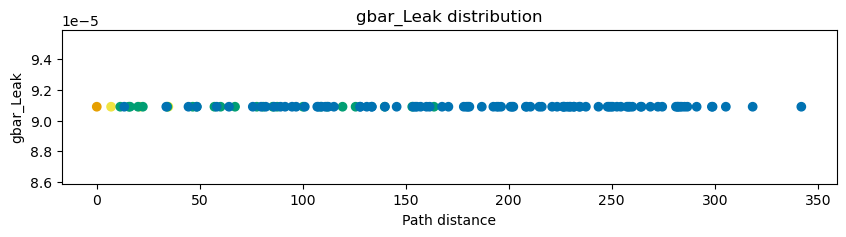

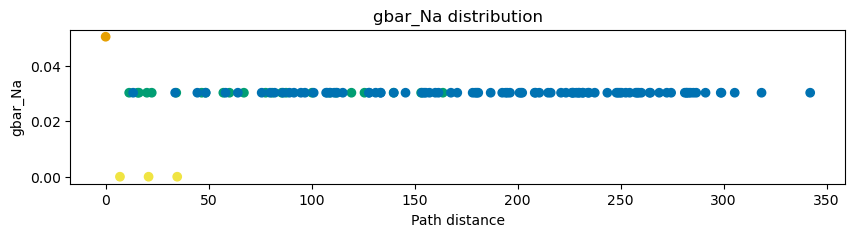

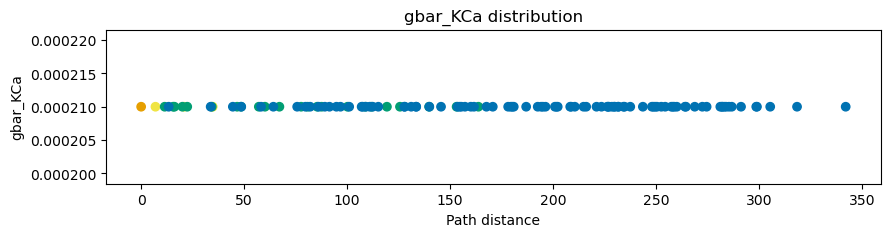

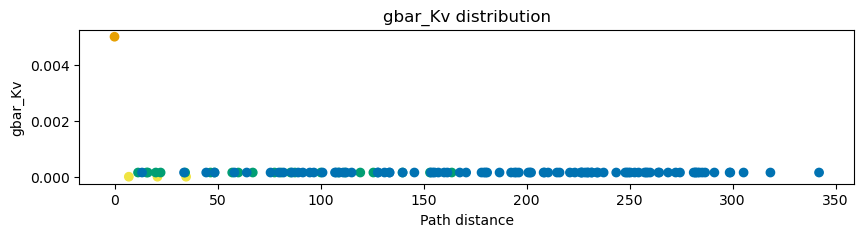

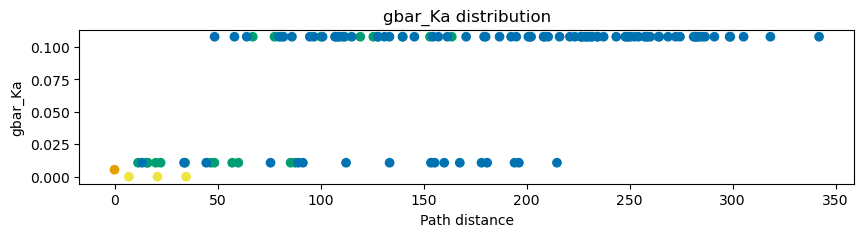

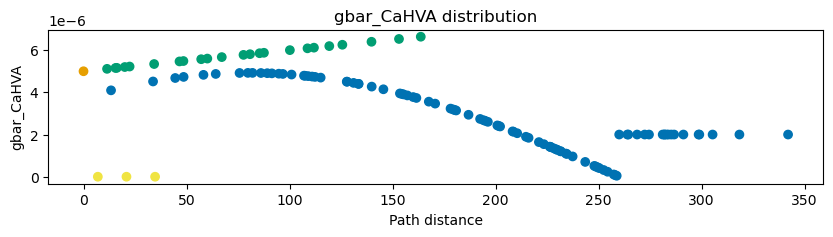

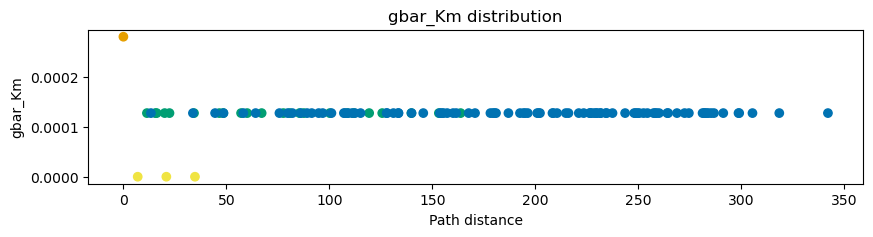

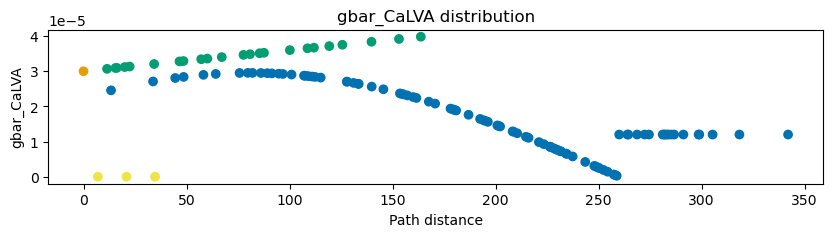

In [18]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

In [19]:
model.set_param('e_Leak', value=-79)
model.set_param('ena', value=60)
model.set_param('ek', value=-80)
model.set_param('eca', value=140)
model.set_param('temperature', value=37)
model.set_param('v_init', value=-79)

In [20]:
model.export_membrane(version='full')

In [21]:
model.distribute_all()

# Simulation

In [22]:
soma = model.sec_tree.soma
soma

••0

In [23]:
model.add_recording(soma, loc=0.5)

In [24]:
model.simulator.vs

In [25]:
model.remove_all_iclamps()
model.add_iclamp(soma, loc=0.5, amp=0.15, delay=100, dur=800)

IClamp added to sec ••0 at loc 0.5.


In [26]:
t, vs, _ = model.simulator.run(1000);

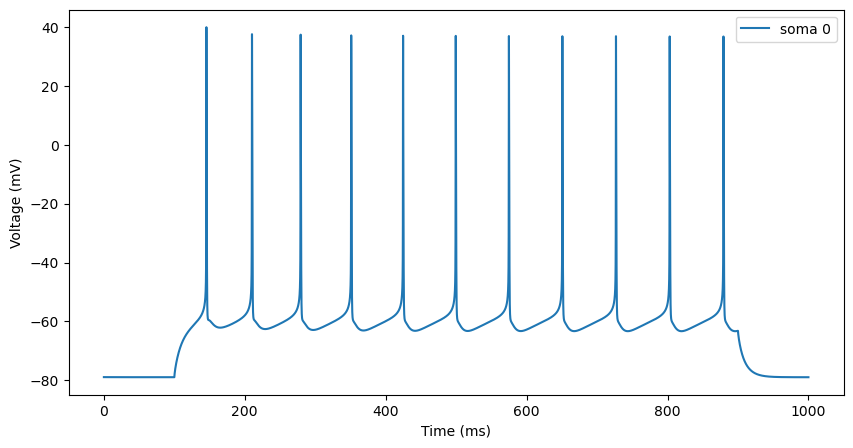

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
model.simulator.plot_voltage(ax=ax)